In [1]:
import cv2

from lexoid.core.conversion_utils import convert_doc_to_base64_images, base64_to_cv2_image
from lexoid.api import parse
from lexoid.core.utils import find_bboxes_for_substring, visualize_bounding_boxes

/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_path = "inputs/test_1.pdf"

In [3]:
page_images = convert_doc_to_base64_images(pdf_path)
_, b64_img = page_images[0]
cv2_img = base64_to_cv2_image(b64_img)
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

## With `STATIC_PARSE`

In [4]:
result = parse(pdf_path, parser_type="STATIC_PARSE", return_bboxes=True)

2025-09-14 21:41:16.948 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-14 21:41:16.953 | DEBUG    | lexoid.api:parse_chunk:124 - Using static parser
Using CPU. Note: This module is much faster with a GPU.
/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [5]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [[0.7879901960784313, 0.22001262626262627, 0.8315631808278867, 0.2335858585858586], [0.8315631808278867, 0.22001262626262627, 0.8533496732026143, 0.2335858585858586], [0.7798202614379085, 0.2398989898989899, 0.860702614379085, 0.257260101010101]]


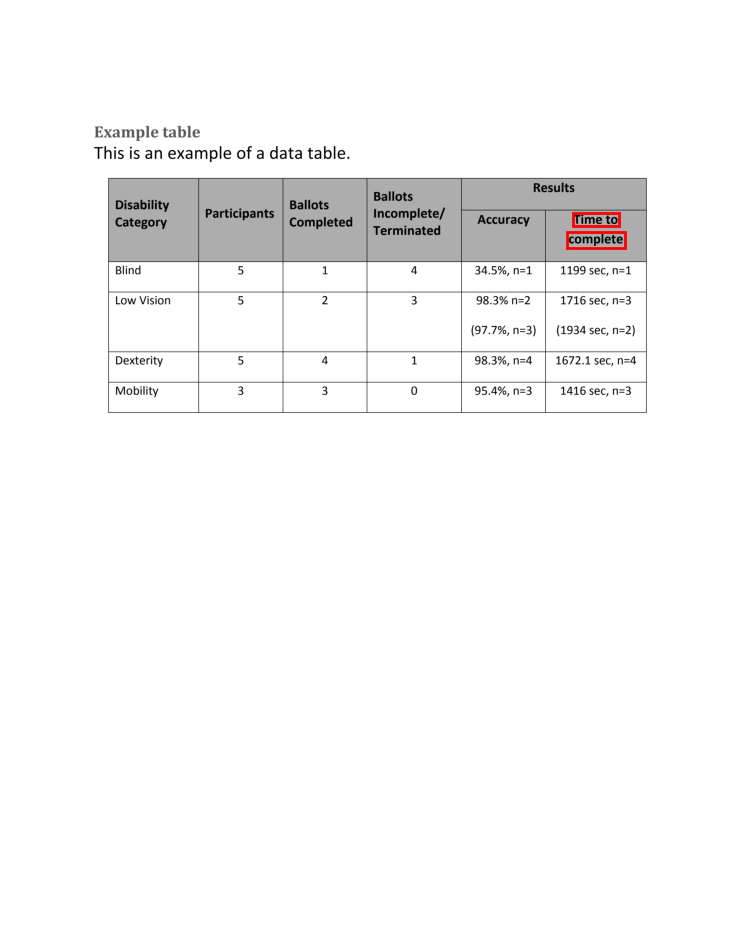

In [6]:
substring = "Time 2 complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [[0.5081699346405228, 0.19507575757575757, 0.5661764705882353, 0.20928030303030304], [0.39052287581699346, 0.2039141414141414, 0.4493464052287582, 0.21906565656565657]]


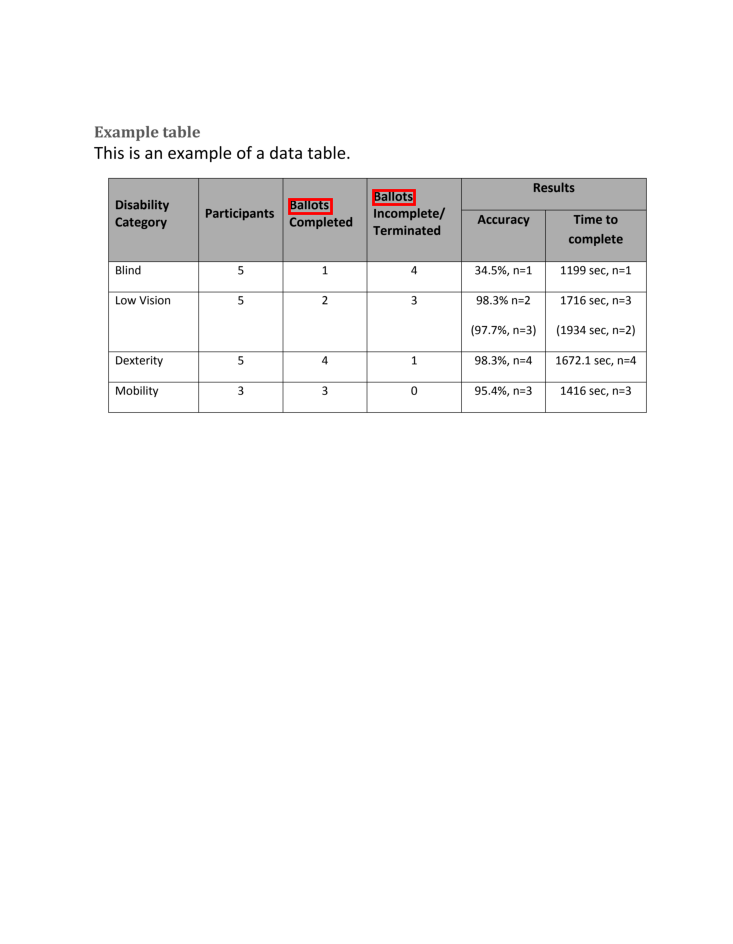

In [7]:
substring = "Ballots"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

## With `LLM_PARSE`

In [4]:
result = parse(pdf_path, parser_type="LLM_PARSE", return_bboxes=True)

2025-09-15 09:36:52.522 | DEBUG    | lexoid.core.utils:is_supported_file_type:64 - File type: application/pdf
2025-09-15 09:36:52.527 | DEBUG    | lexoid.api:parse_chunk:127 - Using LLM parser
Using CPU. Note: This module is much faster with a GPU.
/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [5]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 3 bounding boxes: [[0.7879901960784313, 0.22001262626262627, 0.8315631808278867, 0.2335858585858586], [0.8315631808278867, 0.22001262626262627, 0.8533496732026143, 0.2335858585858586], [0.7798202614379085, 0.2398989898989899, 0.860702614379085, 0.257260101010101]]


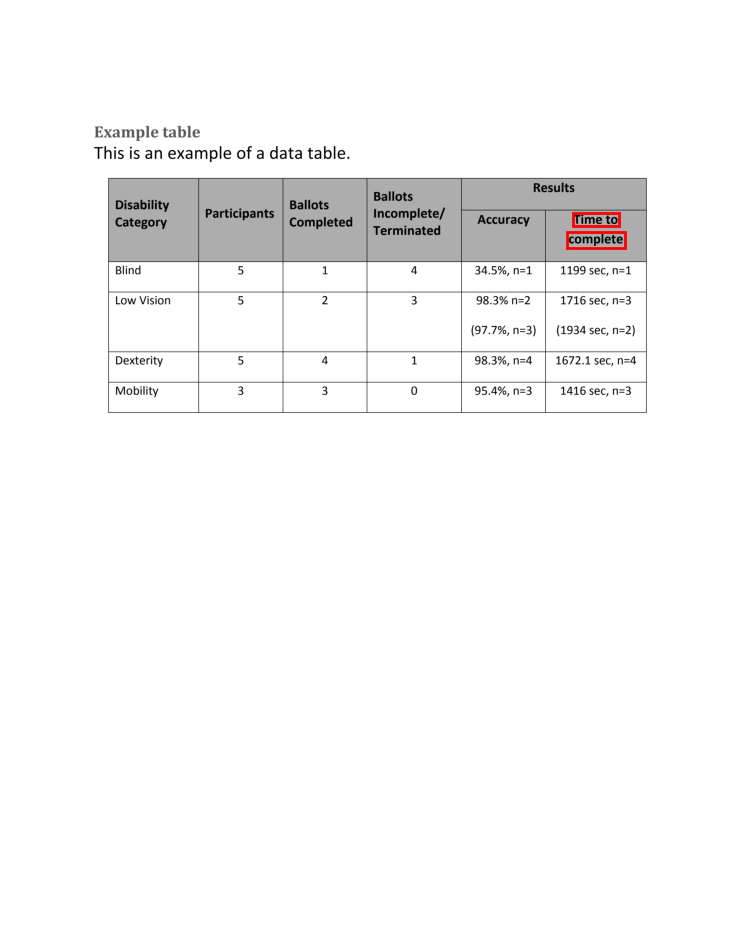

In [6]:
substring = "Time 2 complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

Found 2 bounding boxes: [[0.5081699346405228, 0.19507575757575757, 0.5661764705882353, 0.20928030303030304], [0.39052287581699346, 0.2039141414141414, 0.4493464052287582, 0.21906565656565657]]


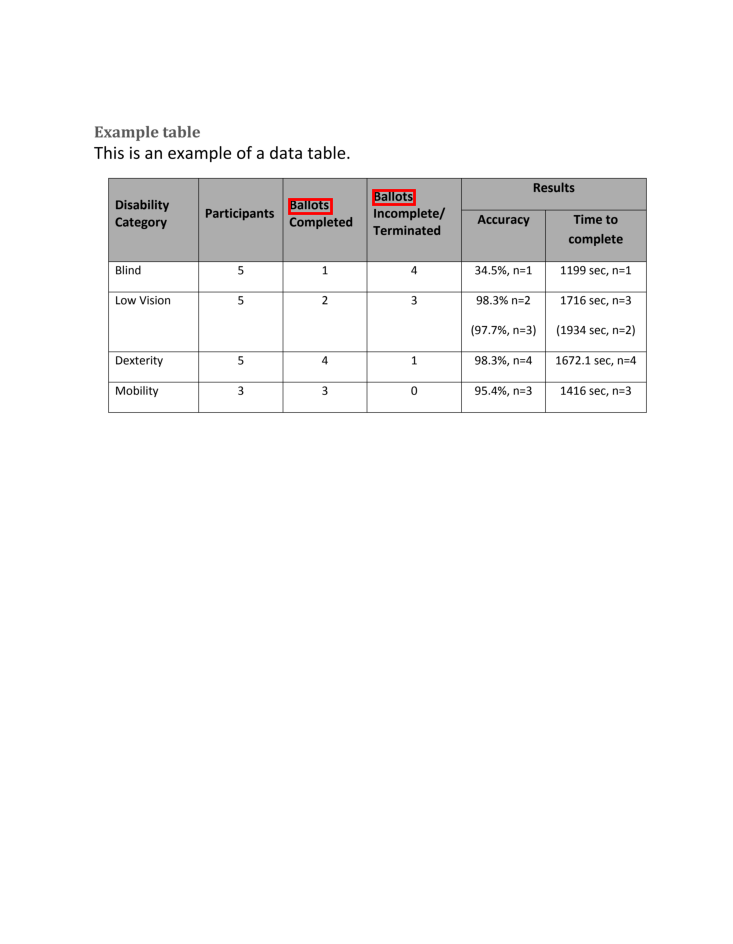

In [11]:
substring = "Ballots"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, match_mode="all_matches")
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(rgb_img, matched_bboxes)

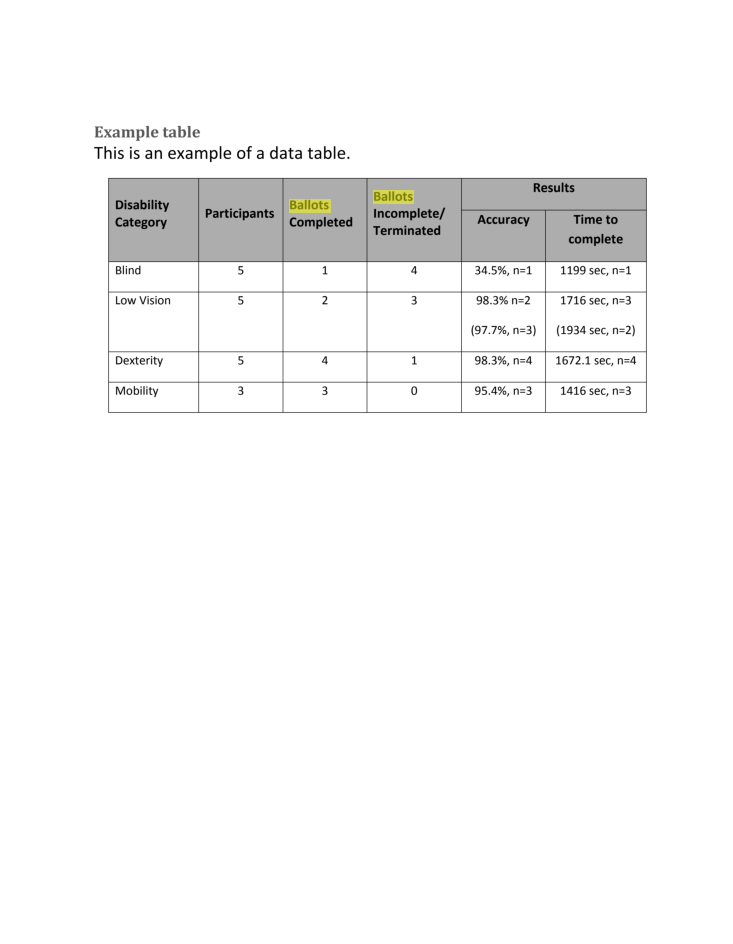

In [12]:
visualize_bounding_boxes(rgb_img, matched_bboxes, highlight=True)